<a href="https://colab.research.google.com/github/JoshuaOmondi/Data-Projects/blob/master/GREAT_OLYMPIANS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GREAT OLYMPIANS EDA**

According to Wikipedia, Olympic Games originated in Ancient Greece over 3000 years ago. However, the first modern olympics took place in 1896 and only featured 12 nations. Participants at the 1896 olympics were all male. Ever since, as more and more events were included, the number of representation has risen significantly and women are now part of olympics too. The data for this project was provided by Kaggle(https://www.kaggle.com/the-guardian/olympic-games). The aim of the project is to improve my exploratory data analysis skills. The project was an inspiration from a fellow Kaggler, Didem Erkan (https://www.kaggle.com/didemerkan).

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [9]:
summer = pd.read_csv('summer.csv')
winter = pd.read_csv('winter.csv')
running_data = pd.read_csv('data.csv')
country_data = pd.read_csv('dictionary.csv')

In [4]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [6]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [36]:
running_data.head(10)

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m
5,6,00:01:41.330000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2011-10-09,Men,800 m
6,7,00:01:41.510000,David Rudisha,KEN,1988-12-17,1.0,Heusden-Zolder,2010-10-07,Men,800 m
7,8,00:01:41.540000,David Rudisha,KEN,1988-12-17,1.0,Saint-Denis,2012-06-07,Men,800 m
8,9,00:01:41.730000,Sebastian Coe,GBR,1956-09-29,1.0,Firenze,1981-10-06,Men,800 m
9,9,00:01:41.730000,Wilson Kipketer,DEN,1970-12-12,1.0,Stockholm,1997-07-07,Men,800 m


Kenya dominates the 800 metres events.




In [26]:
running_data[running_data['Gender']=='Men']['Name'].value_counts()[:1]

Michael Johnson    122
Name: Name, dtype: int64

In [12]:
country_data.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


## **Summer Olympics EDA**

In [13]:
summer['Athlete']=summer['Athlete'].str.split(', ').str[::-1].str.join(' ')
summer['Athlete']=summer['Athlete'].str.title()
winter['Athlete']=winter['Athlete'].str.split(', ').str[::-1].str.join(' ')
winter['Athlete']=winter['Athlete'].str.title()

In [14]:
#merging data
summer=summer.merge(country_data,left_on='Country',right_on='Code',how='left')
summer.head()

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.230578


In [15]:
#Indexing columns
summer=summer[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
summer.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']

In [16]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [17]:
summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1]

Michael Phelps    22
Name: Athlete, dtype: int64

In [18]:
# Finding the greatest atheletes
print('The Highest Decorated Male Athlete is: ',summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with: ',summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],' medals')
print('The Highest Decorated Female Athlete is: ',summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],'with: ',summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals')

The Highest Decorated Male Athlete is:  Michael Phelps with:  22  medals
The Highest Decorated Female Athlete is:  Larisa Latynina with:  18  medals


In [19]:
medals=summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals=medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns=[['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
17344,Michael Phelps,Gold,18
7645,Franziska Van Almsick,Bronze,6
22307,Shirley Farber Babashoff,Silver,6


## **Medals Distribution By Country**

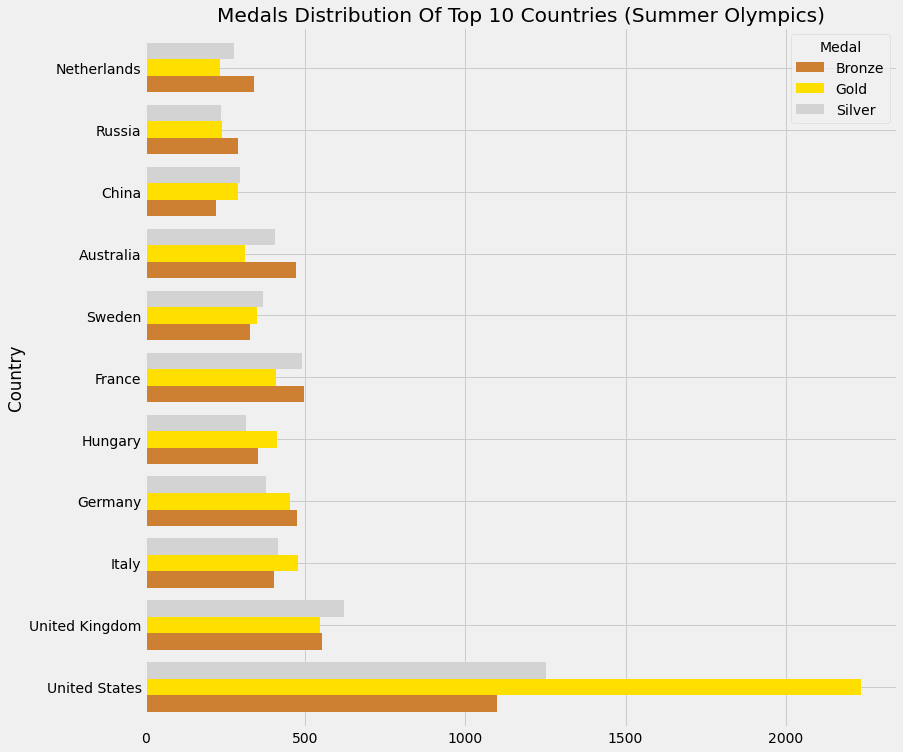

In [20]:
medals_country=summer.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('Country','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

The United States is the leading country in medals won.

## **Visualizing Best Athletes**

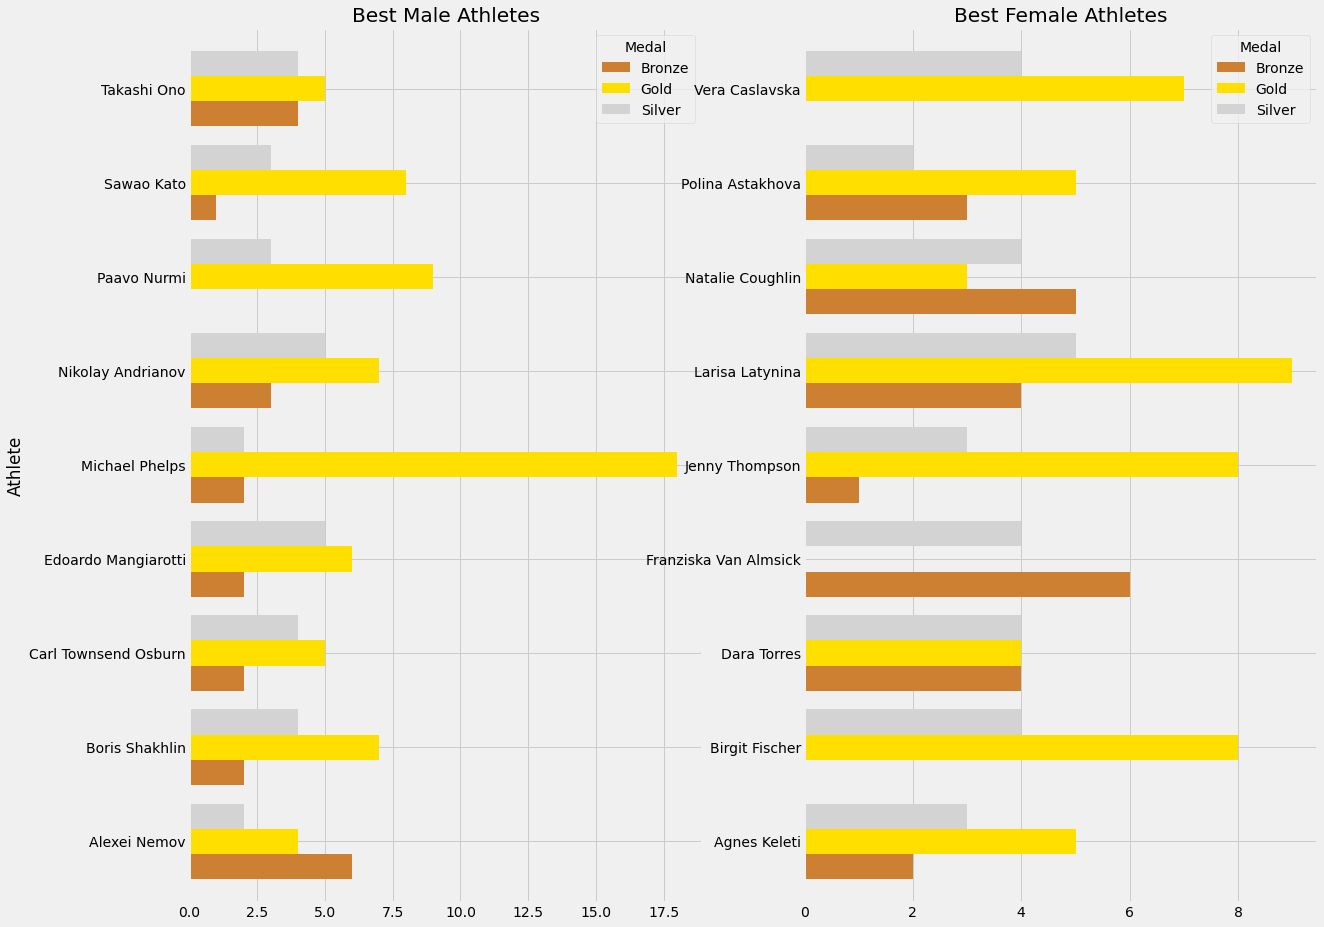

In [21]:

fig,ax=plt.subplots(1,2,figsize=(18,15))
men=summer[summer['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
men=men[men['Athlete'].isin(summer['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Code')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=summer[summer['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
women=women[women['Athlete'].isin(summer['Athlete'].value_counts().index[:30])]
women=women.pivot('Athlete','Medal','Code')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

## **Visualizing Medals won per country in different Summer Olympics Events**

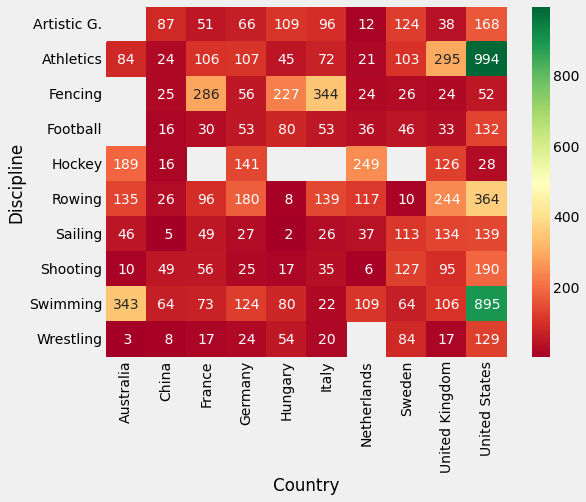

In [22]:
# Visualizing a heat map
summer.loc[summer['Discipline'].str.contains('Wrestling'),'Discipline']='Wrestling'
summer.loc[summer['Discipline'].str.contains('Weightlifting'),'Discipline']='Weightlifting'
test=summer[summer['Country'].isin(summer['Country'].value_counts()[:10].index)]
test=test[test['Discipline'].isin(summer['Discipline'].value_counts()[:10].index)]
test=test.groupby(['Country','Discipline'])['Sport'].count().reset_index()
test=test.pivot('Discipline','Country','Sport')
sns.heatmap(test,cmap='RdYlGn',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

The USA dominate in swimming and athletics.

## **Visualizing the Medals won per country over time**

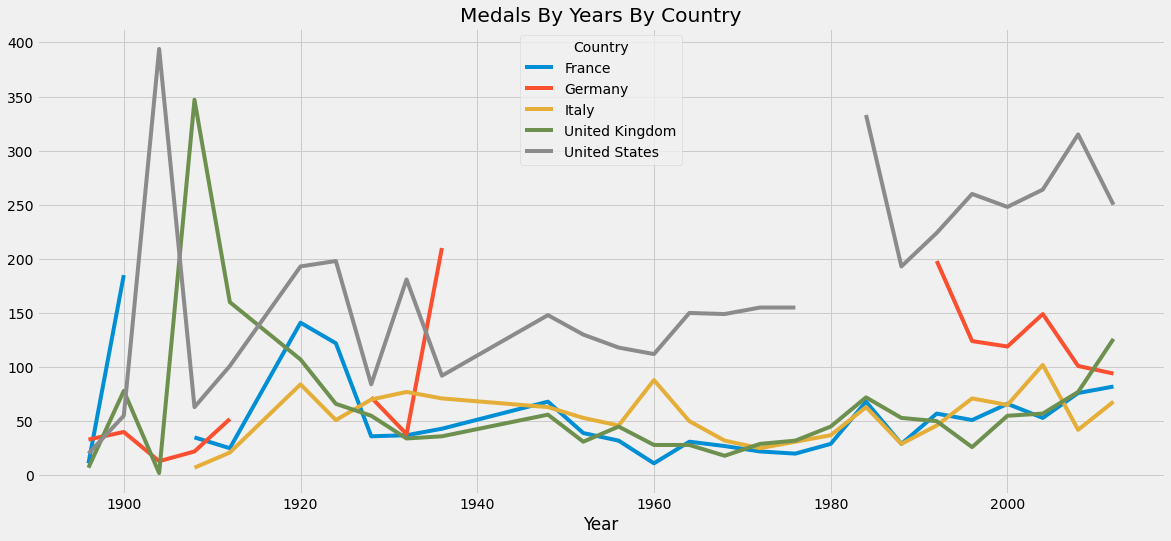

In [23]:
test1=summer.groupby(['Country','Year'])['Medal'].count().reset_index()
test1=test1[test1['Country'].isin(summer['Country'].value_counts()[:5].index)]
test1=test1.pivot('Year','Country','Medal')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals By Years By Country')
plt.show()

## **Performance of USA Atheletes**

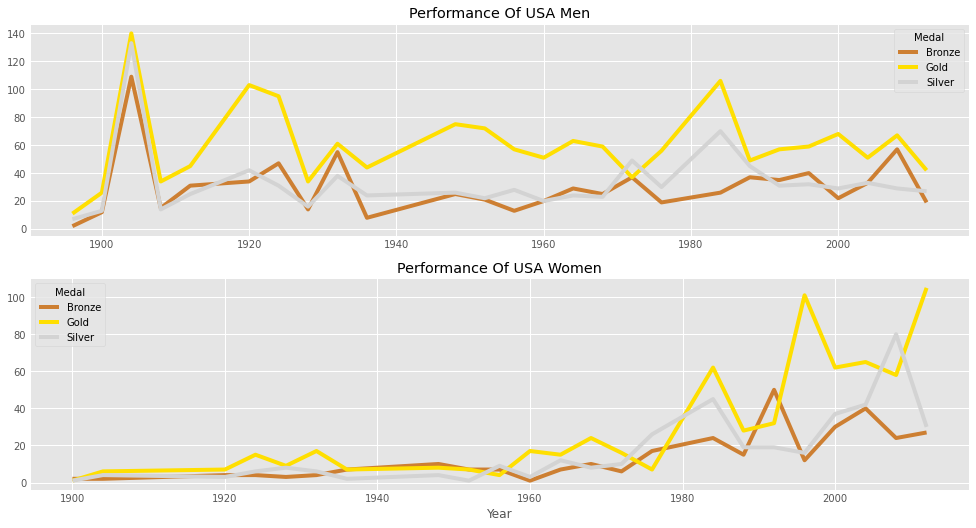

In [46]:
USA_medal_male=summer[(summer['Country']=='United States')&(summer['Gender']=='Men')]
USA_medal_female=summer[(summer['Country']=='United States')&(summer['Gender']=='Women')]
fig,ax=plt.subplots(2,figsize=(15,8))
male=USA_medal_male.groupby(['Medal','Year'])['Event'].count().reset_index()
male=male.pivot('Year','Medal','Event')
male.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_title('Performance Of USA Men')
female=USA_medal_female.groupby(['Medal','Year'])['Event'].count().reset_index()
female=female.pivot('Year','Medal','Event')
female.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Performance Of USA Women')
plt.show()

Women representation at the Winter Olympics was very low in the 1900s. However, beginning early 80s, as the performance of women athletes in the USA started picking, their representation also improved. 

## **Performance of Kenyan Atheletes**

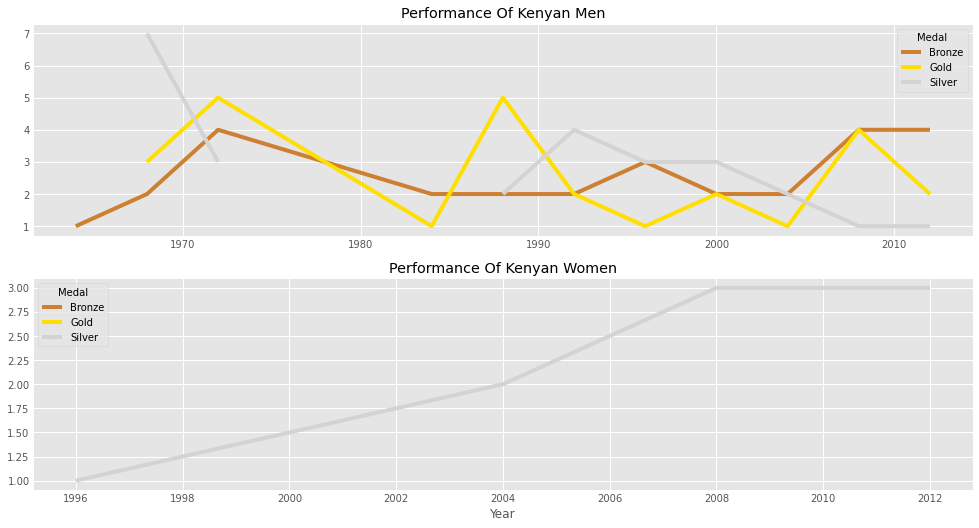

In [49]:
Kenya_medal_male=summer[(summer['Country']=='Kenya')&(summer['Gender']=='Men')]
Kenya_medal_female=summer[(summer['Country']=='Kenya')&(summer['Gender']=='Women')]
fig,ax=plt.subplots(2,figsize=(15,8))
male=Kenya_medal_male.groupby(['Medal','Year'])['Event'].count().reset_index()
male=male.pivot('Year','Medal','Event')
male.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_title('Performance Of Kenyan Men')
female=Kenya_medal_female.groupby(['Medal','Year'])['Event'].count().reset_index()
female=female.pivot('Year','Medal','Event')
female.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Performance Of Kenyan Women')
plt.show()

Kenyan male atheletes have won atleast all medals.
Female atheltes have only won silver medals since their first representation in the summer olympics of 1996. Their performance has been improving over the years but flattened out since 2008. 
Overally, the performance of Kenyan atheletes is not as good compared to top nations like USA. This is partly because the country is mostly famous for track events. As a country, we have very little representation in most of the summer olympic games.

## **Winter Olympics EDA**

In [37]:
print('The Highest Decorated Male Athlete is: ',winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with: ',winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],' medals')
print('The Highest Decorated Male Athlete is: ',winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],'with: ',winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals')

The Highest Decorated Male Athlete is:  Ole Einar Bjoerndalen with:  13  medals
The Highest Decorated Male Athlete is:  Stefania Belmondo with:  10  medals


In [39]:
# Medal count by athelete
winter=winter.merge(country_data,left_on='Country',right_on='Code',how='left')
winter=winter[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
winter.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']
medals=winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals=medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns=[['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
569,Björn Daehlie,Gold,8
1655,Harri Kirvesniemi,Bronze,6
3568,Raisa Smetanina,Silver,5


In [40]:
# Medal count by country
medals_map = winter.groupby(['Country','Code'])['Medal'].count().reset_index()
medals_map.head()

,Country,Code,Medal
0,Australia,AUS,15
1,Austria,AUT,280
2,Belarus,BLR,15
3,Belgium,BEL,13
4,Bulgaria,BUL,6


## **Distribution of Medals by Top Countries**

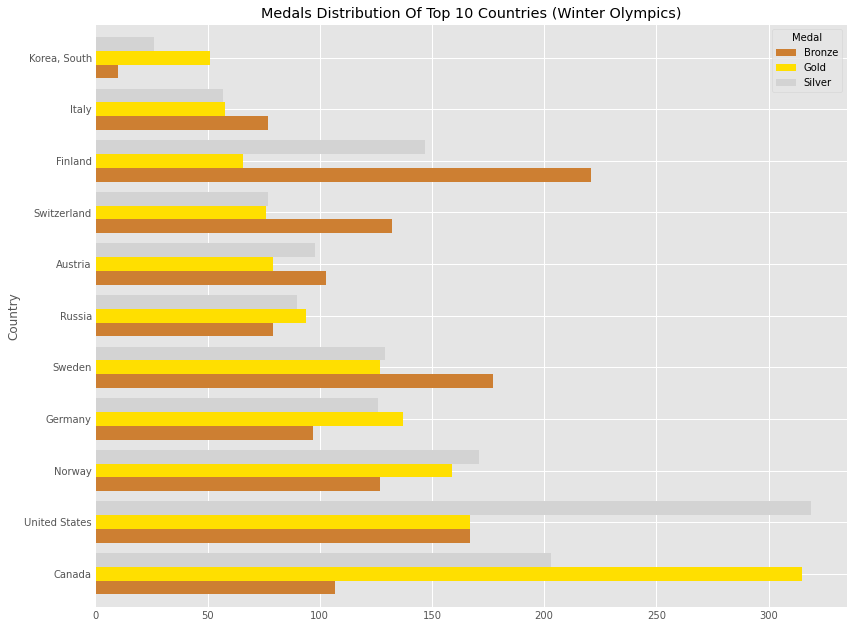

In [43]:
medals_country=winter.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('Country','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.title('Medals Distribution Of Top 10 Countries (Winter Olympics)')
plt.show()

## **Model Distribution By Athletes**

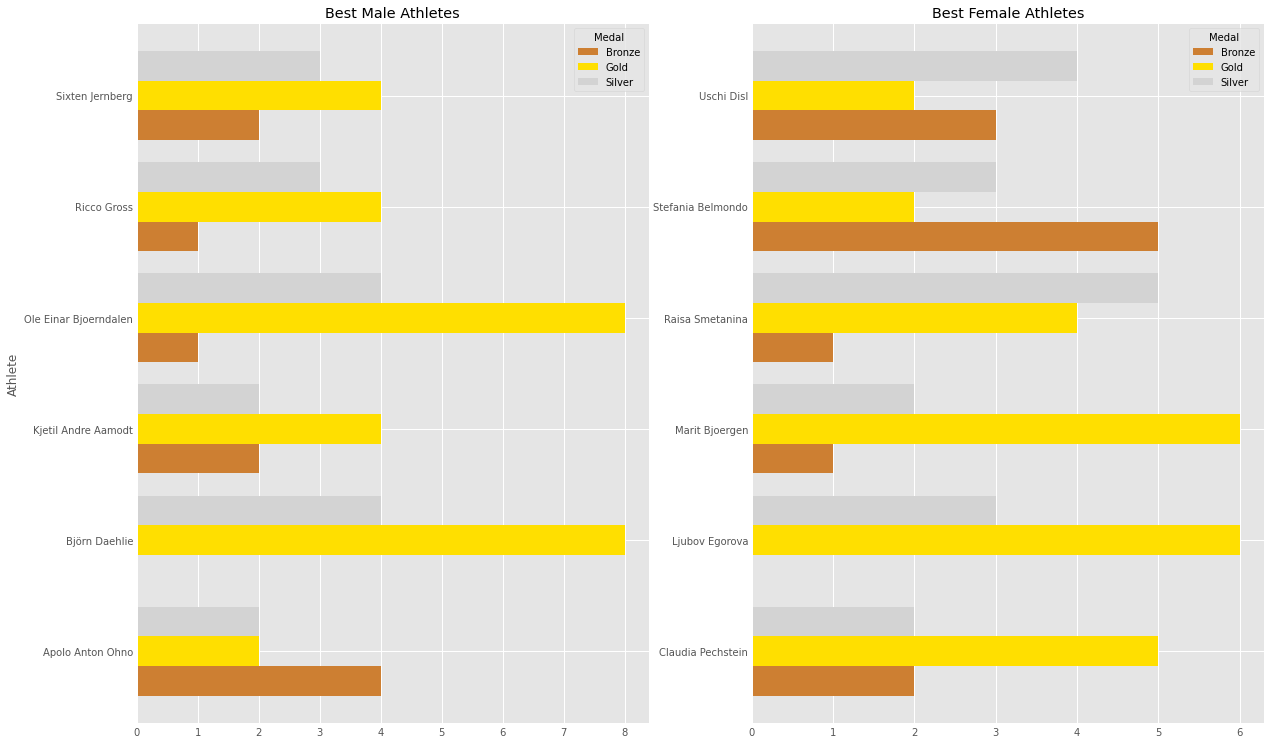

In [44]:
fig,ax=plt.subplots(1,2,figsize=(18,12))
men=winter[winter['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
men=men[men['Athlete'].isin(winter['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Code')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=winter[winter['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
women=women[women['Athlete'].isin(winter['Athlete'].value_counts().index[:10])]
women=women.pivot('Athlete','Medal','Code')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

## **Performance of USA Atheletes**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



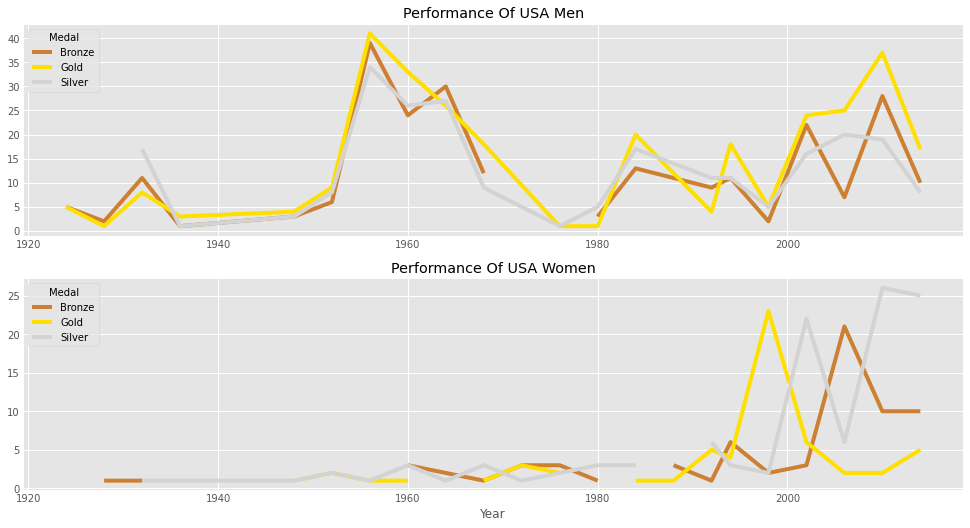

In [47]:
USA_medal_male=winter[(summer['Country']=='United States')&(winter['Gender']=='Men')]
USA_medal_female=winter[(winter['Country']=='United States')&(winter['Gender']=='Women')]
fig,ax=plt.subplots(2,figsize=(15,8))
male=USA_medal_male.groupby(['Medal','Year'])['Event'].count().reset_index()
male=male.pivot('Year','Medal','Event')
male.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_title('Performance Of USA Men')
female=USA_medal_female.groupby(['Medal','Year'])['Event'].count().reset_index()
female=female.pivot('Year','Medal','Event')
female.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Performance Of USA Women')
plt.show()

Performance of USA atheletes in the winter olympics is not as good as summer olympics. There is no consistency like we saw in the summer olympics.